In [1]:
# Loading all datasets and importing all necessary libraries for the task

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
from scipy.stats import zscore
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings('ignore')

complex9 = pd.read_csv("https://www2.cs.uh.edu/~ceick/UDM/DataSets/Complex9.txt", header = None, sep = ",")
complex9gn8 = pd.read_csv("http://www2.cs.uh.edu/~ceick/UDM/DataSets/complex9_gn8.txt", header = None, sep = ",")

# z-score the shuttle dataset
shuttleDf = pd.read_csv("Shuttle22.csv", header = None)
shuttleClass = pd.DataFrame(shuttleDf[shuttleDf.columns[9]])
ZSHUT = pd.DataFrame(shuttleDf[shuttleDf.columns[:9]])
ZSHUT = ZSHUT.apply(zscore)
ZSHUT = ZSHUT.join(shuttleClass)

In [2]:
# Subtask a: Write a function that will return the purity of the dataset

def purity(a,b,outliers=False):
    if outliers:
        outlierCount = 0
        size = len(b)
        for i in range(size):
            if b[i] == -1:
                outlierCount += 1
        contingencyMat = metrics.cluster.contingency_matrix(a,b)
        return np.sum(np.amax(contingencyMat, axis = 0))/np.sum(contingencyMat), outlierCount/size
    else:
        contingencyMat = metrics.cluster.contingency_matrix(a,b)
        return np.sum(np.amax(contingencyMat, axis = 0))/np.sum(contingencyMat)

The above cell is my function to calculate the purity of two different arrays that consist of true labels (a) and predicted labels of the clustering algorithm (b). Outliers will be set to False as the default, we will only need to set this to true when we run DBSCAN since DBSCAN will include outliers vice versa to KMeans which consists of no outliers. If outliers is set to true, we will take into consideration the outlier count and make a for loop that goes through each label of the predicted labels from the clustering algo. If the label is equal to -1, then it is an outlier and we will increment outlier count. We will then use metrics.cluster.contingency_matrix of a and b to find the error of predicted labels and finally, we will return the sum of all correctly predicted labels by the total amount of labels in the dataset (this will be purity). We will also return the outlier percentage by dividing the outlierCount that we incremented by the size of the dataset b. 

If outliers is False, we will execute the same steps as stated above but not considering outliers so just calculating the purity of the comparison of both datasets a and b.

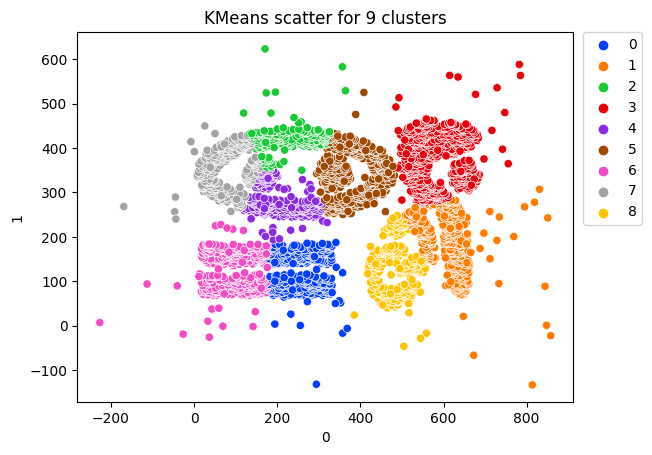

Purity of KMeans for 9 clusters is 0.7103574702108157


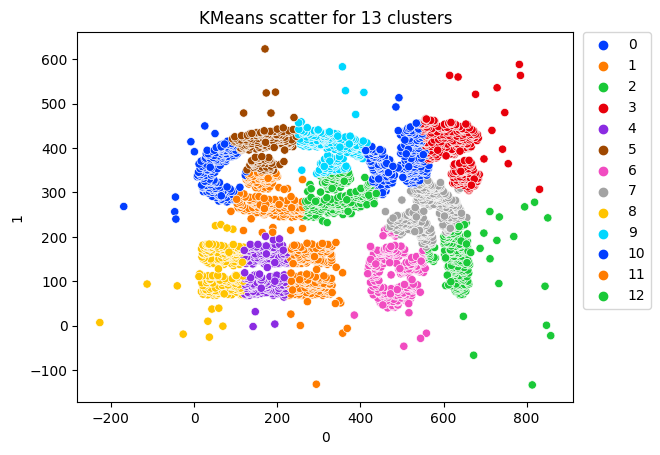

Purity of KMeans for 13 clusters is 0.6801099908340972


In [3]:
# Subtask b: Run K-means 20 times for k = 9 and k = 13 for complex9gn8, visualize clusters, and run through purity function
# I tried to run KMeans 20 times but every SSE of each run was really similar to I opted out of running KMeans 20 times because it was
# slowing down my computer

palette=sns.color_palette("bright", as_cmap=True)
    
kmean9 = KMeans(n_clusters=9, random_state=0).fit(complex9gn8[complex9gn8.columns[:2]])

sns.scatterplot(data=complex9gn8, x = complex9gn8[complex9gn8.columns[0]], y = complex9gn8[complex9gn8.columns[1]], hue=kmean9.labels_, palette=palette)
plt.title("KMeans scatter for 9 clusters")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
print("Purity of KMeans for 9 clusters is " + str(purity(complex9gn8[complex9gn8.columns[2]], kmean9.labels_)))

kmean13 = KMeans(n_clusters=13, random_state=0).fit(complex9gn8[complex9gn8.columns[:2]])

sns.scatterplot(data=complex9gn8, x = complex9gn8[complex9gn8.columns[0]], y = complex9gn8[complex9gn8.columns[1]], hue=kmean13.labels_, palette=palette)
plt.title("KMeans scatter for 13 clusters")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
print("Purity of KMeans for 13 clusters is " + str(purity(complex9gn8[complex9gn8.columns[2]], kmean13.labels_)))

The above is a visualization of the KMeans algorithm for clusters = 9 and clusters = 13. I have named the graphs accordingly as well as printed out the purity of the clustering algorithms underneath each respective visualization. As we can see, the purity of both stay in the range of about .5 - .75 which means that KMeans does decent enough to correctly predict the class labels of the dataset with at least 50% accuracy but no more than 75% accuracy.

This purity of 3 KMean clustering is 0.8380862068965518


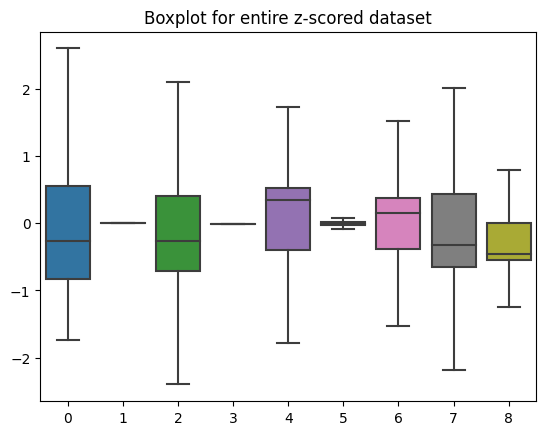

Centroid for attribute 0 = -1.7555305868003854e-16
Centroid for attribute 1 = 2.3582668385141256e-18
Centroid for attribute 2 = 7.107877504965692e-16
Centroid for attribute 3 = 3.215818416155626e-18
Centroid for attribute 4 = 2.9401768376280007e-18
Centroid for attribute 5 = 1.0413126299932503e-18
Centroid for attribute 6 = -1.1344182298514703e-16
Centroid for attribute 7 = 1.1252301772338828e-16
Centroid for attribute 8 = -3.730349362740526e-17


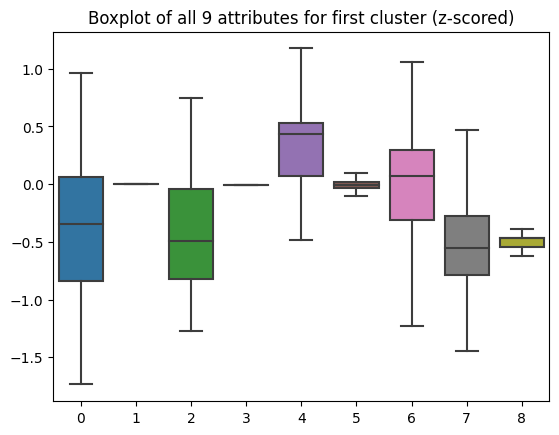

Centroid for attribute 0 = -0.295692698210221
Centroid for attribute 1 = -0.006641638548206516
Centroid for attribute 2 = -0.4587214931495999
Centroid for attribute 3 = -0.007090397571321753
Centroid for attribute 4 = 0.2487347678222403
Centroid for attribute 5 = 0.009738998593589895
Centroid for attribute 6 = -0.03283650023963884
Centroid for attribute 7 = -0.4468074187192123
Centroid for attribute 8 = -0.3543584480004939


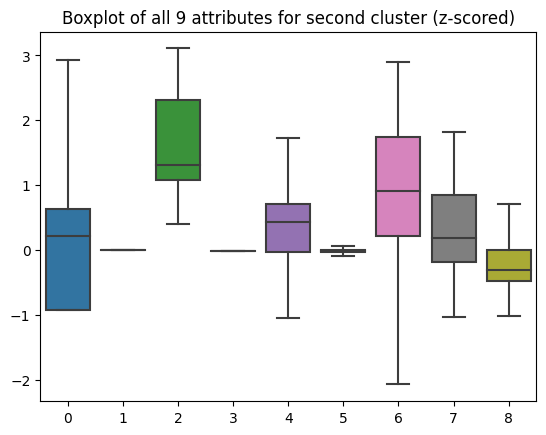

Centroid for attribute 0 = 0.2645632035164785
Centroid for attribute 1 = -0.03246292709106357
Centroid for attribute 2 = 1.615579349112683
Centroid for attribute 3 = 0.023576855885001073
Centroid for attribute 4 = 0.3375384292266874
Centroid for attribute 5 = -0.004774397930453213
Centroid for attribute 6 = 0.845143406206651
Centroid for attribute 7 = 0.3268506576285083
Centroid for attribute 8 = -0.16269071097324916


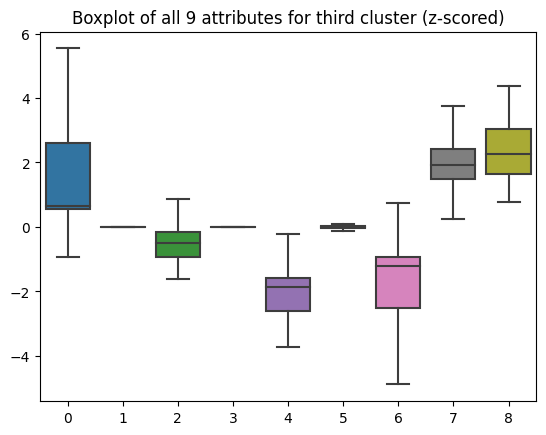

Centroid for attribute 0 = 1.2447372700323152
Centroid for attribute 1 = 0.10339707294681391
Centroid for attribute 2 = -0.4362291835131429
Centroid for attribute 3 = -0.0040026898337473926
Centroid for attribute 4 = -2.1472301287846376
Centroid for attribute 5 = -0.04873482838015819
Centroid for attribute 6 = -1.4641568994896903
Centroid for attribute 7 = 2.0240961636372394
Centroid for attribute 8 = 2.4340425884191403


In [4]:
# Subtask c: Run KMeans for ZSHUT dataset, compute the purity, and visualize data with boxplots 

palette=sns.color_palette("bright", as_cmap=True)

kmean3 = KMeans(n_clusters=3, random_state=0).fit(ZSHUT[ZSHUT.columns[:9]])
print("This purity of 3 KMean clustering is " + str(purity(ZSHUT[ZSHUT.columns[9]], kmean3.labels_)))

# Boxplot for all attributes in each cluster
clusters = pd.DataFrame(kmean3.labels_)
firstClust = clusters.index[clusters[0] == 0].tolist()
secondClust = clusters.index[clusters[0] == 1].tolist()
thirdClust = clusters.index[clusters[0] == 2].tolist()
firstZ = ZSHUT[ZSHUT.columns[:9]].loc[firstClust]
secondZ = ZSHUT[ZSHUT.columns[:9]].loc[secondClust]
thirdZ = ZSHUT[ZSHUT.columns[:9]].loc[thirdClust]

# Boxplot of zscored dataset as a whole for reference:
sns.boxplot(data=ZSHUT[ZSHUT.columns[:9]], showfliers = False)
plt.title("Boxplot for entire z-scored dataset")
plt.show()
for i in range(9):
    print("Centroid for attribute " + str(i) + " = " + str(ZSHUT[ZSHUT.columns[i]].mean()))

# Boxplot for first cluster:
sns.boxplot(data=firstZ, showfliers = False)
plt.title("Boxplot of all 9 attributes for first cluster (z-scored)")
plt.show()
for i in range(9):
    print("Centroid for attribute " + str(i) + " = " + str(firstZ[firstZ.columns[i]].mean()))
    
# Boxplot for second cluster:
sns.boxplot(data=secondZ, showfliers = False)
plt.title("Boxplot of all 9 attributes for second cluster (z-scored)")
plt.show()
for i in range(9):
    print("Centroid for attribute " + str(i) + " = " + str(secondZ[secondZ.columns[i]].mean()))
    
# Boxplot for third cluster:
sns.boxplot(data=thirdZ, showfliers = False)
plt.title("Boxplot of all 9 attributes for third cluster (z-scored)")
plt.show()
for i in range(9):
    print("Centroid for attribute " + str(i) + " = " + str(thirdZ[thirdZ.columns[i]].mean()))
    

Above, I have printed out the purity of KMean = 3 for the ZSHUT dataset as well as the boxplot of the entire z-scored dataset along with each clusters boxplot of all 9 attributes obstained from the z-scored dataset of the shuttle dataframe. Underneath every boxplot, I have printed out the centroids of every attribute given their respective cluster visualization. As you can see from the visualization, the balance between all the clusters boxplots attributes are maintained throughout the observation of the series of boxplots. Let's take attribute 0 for an examples, we can see that in the first cluster, the majority of the values reside below 0. In the second cluster, the majority of the values reside just relatively in the middle of the graph which closely resembles the original z-scored datasets boxplot. Finally, in the third cluster, we can see that the majority of the values are above 0 and reach up to 2. This indicated that every cluster is able to differnetiate the values of each attribute thoroughly to where every cluster is spaced out from one another and consists of little overlap between all clusters.

In [5]:
# Subtask d: Use DBSCAN clustering for ZSHUT and calculate purity of clustered dataset:

dbzshut = DBSCAN(eps = .5, min_samples = 5, n_jobs = -1).fit(ZSHUT[ZSHUT.columns[:9]])
dbPurity, dbOutlier = purity(ZSHUT[ZSHUT.columns[9]], dbzshut.labels_, True)
print("The DBSCAN clustered dataset of ZSHUT has " + str(len(Counter(dbzshut.labels_)) - 1) + " clusters")
print("The purity of DBSCAN clutered dataset of ZSHUT is " + str(dbPurity))
print("The outlier percentage of DBSCAN clustered dataset of ZSHUT is " + str(dbOutlier))

The DBSCAN clustered dataset of ZSHUT has 5 clusters
The purity of DBSCAN clutered dataset of ZSHUT is 0.8422758620689655
The outlier percentage of DBSCAN clustered dataset of ZSHUT is 0.004413793103448276


In [6]:
# Subtask e: Creating a procedure to find the best epsilon and min_samples for DBSCAN on complex9gn8 dataset
# I first ran DBSCAN using arbitrary epsilons and min_samples to find a nice range to exectue the for loops to play it safe
# so I won't have to wait 10 years for a range of parameters that won't give any results that pertain to the conditions 
# in the word document


epsilons = np.arange(1.0,20.0,.5)
minSamples = np.arange(1,31,1)
dbTuples = []
for i in epsilons:
    for j in minSamples:
        dbcomplex = DBSCAN(eps = i, min_samples = j, n_jobs = -1).fit(complex9gn8[complex9gn8.columns[:2]])
        clustCount = len(Counter(dbcomplex.labels_))-1
        dbPurity, dbOutlier = purity(complex9gn8[complex9gn8.columns[2]], dbcomplex.labels_, True)
        if(dbOutlier <= .1 and clustCount >= 2 and clustCount <= 15 and metrics.silhouette_score(complex9gn8, dbcomplex.labels_) > 0):
            dbTuples.append((dbPurity, i, j))


The procedure will consist of 2 for loops that iterate through an array that I found to be the most efficient windows of both epsilon and min_samples. In every nested for loop, we will run DBSCAN on the complex9gn8 dataset and we will count the number of clusters as well as the purity and outlier percentage of the model. I created an if statement that will check if the model produces an outlier percentage less than 10% as well as a cluster count between 2 and 15. I also added a silhouette score that is greater than 0 because we want clusters that will not overlap each other. If the if statement conditions are met, we have an array called dbTuples that I will append the purity number, the epsilon, and the min_samples respectively. The next few cells will demonstrate how I will chose the best parameters for the DBSCAN operation to obtain the highest purity.

In [7]:
# Finds the tuple with max purity in the dataset dbTuples
# dbTuples consist of all models of DBSCAN that meet the threshold of less that 10% outliers and between 2 and 15 clusters
# as well as a positive silhouette score (don't want overlapping clusters)

dbTuples = pd.DataFrame(dbTuples)
maxPurity = dbTuples[:][0].max()
maxTuple = dbTuples.loc[dbTuples[:][0] == maxPurity]
bestEps = int(maxTuple[1])
bestSamples = int(maxTuple[2])

The above cell will take the dbTuples array and make it into a dataset with the tuples seperated by columns. We will find the maximum purity by calling the .max() operation on the first column and assign the tuple with the max purity to the variable maxTuple. We will then assign bestEps and bestSamples to their respective position in the maxTuple tuple.

In [8]:
# Use bestEps and bestSamples from previous cell to run DBSCAN on complex9 dataset

dbcomplex9 = DBSCAN(eps = bestEps, min_samples = bestSamples).fit(complex9[complex9.columns[:2]])
dbcPurity, dbcOutliers = purity(complex9[complex9.columns[2]], dbcomplex9.labels_, True)
print("Purity of bestEps and bestSamples on complex9 dataset is " + str(dbcPurity))
print("Outlier percentage of bestEps and bestSamples on complex9 dataset is " + str(dbcOutliers))

Purity of bestEps and bestSamples on complex9 dataset is 0.9937314417683932
Outlier percentage of bestEps and bestSamples on complex9 dataset is 0.012867040580666447


Finally, we will run DBSCAN once more using the bestEps and bestSamples obtained from the previous cell and extract the purity and outlier percentage of the model. This time we will fit the model to the complex9 dataset instead of the complex9gn8 dataset to validate the efficieny and effectiveness of the best parameters. I then outputted the obtained purity and outlier percentage of the model that uses the best parameters and as you can see, the results are very accurate with about 1% outliers and a purity score of .99.

In [9]:
# Extra credit: apply procedure to original shuttle dataset
# Had to use smaller ranges of parameters because DBSCAN for the shuttle dataset will prove to take more processing power
# Same concept as above, I ran DBSCAN on the dataset manually a couple of time to find a decent range of parameters

dbsTuples = []
epsilons = np.arange(6,11,1)
minSamples = np.arange(25,36,5)
dbTuples = []
for i in epsilons:
    for j in minSamples:
        dbShuttle = DBSCAN(eps = i, min_samples = j, n_jobs = -1).fit(shuttleDf[shuttleDf.columns[:9]])
        clustCount = len(Counter(dbShuttle.labels_))-1
        dbPurity, dbOutlier = purity(shuttleDf[shuttleDf.columns[9]], dbShuttle.labels_, True)
        if(dbOutlier <= .1 and clustCount >= 2 and clustCount <= 15 and metrics.silhouette_score(complex9gn8, dbcomplex.labels_) > 0):
            dbsTuples.append((dbPurity, i, j))

In [10]:
# Finds the tuple with max purity in the dataset dbsTuples, similar to previous task to find best parameters for clustering with
# DBSCAN

dbsTuples = pd.DataFrame(dbsTuples)
maxsPurity = dbsTuples[:][0].max()
maxsTuple = pd.DataFrame(dbsTuples.loc[dbsTuples[:][0] == maxsPurity])
dbmax = DBSCAN(eps = int(maxsTuple[1]), min_samples = int(maxsTuple[2])).fit(shuttleDf[shuttleDf.columns[:9]])
print("Number of clusters with eps = " + str(int(maxsTuple[1])) + " and min_samples = " + str(int(maxsTuple[2])) + " is " + str(len(Counter(dbmax.labels_))))
print("The above best parameters ran through DBSCAN with ShuttleDf dataset results in a purity of " + str(maxsPurity))

Number of clusters with eps = 9 and min_samples = 25 is 5
The above best parameters ran through DBSCAN with ShuttleDf dataset results in a purity of 0.9185862068965517
